In [2]:
import numpy as np

import pickle as pkl
import matplotlib.pyplot as plt
import pandas as pd
import cv2
from skimage import io
from tqdm import tqdm

In [9]:
def cut(image, cords, im_size=224):
    face = copy(cords)
    target_size = im_size

    w = face[2] - face[0] + 1
    h = face[3] - face[1] + 1

    s = max(w, h)
    if (h < s):
        dh = s - h
        dh_up = face[1]
        dh_down = image.shape[0] - face[3] - 1
        if dh_up + dh_down < dh:
            face[1] = 0
            face[3] = image.shape[0] - 1
        else:
            dh_up_inc = dh // 2 + dh % 2
            dh_down_inc = dh // 2
            if dh_up < dh_up_inc:
                dh_down_inc += dh_up_inc - dh_up
                dh_up_inc = dh_up
            elif dh_down < dh_down_inc:
                dh_up_inc += dh_down_inc - dh_down
                dh_down_inc = dh_down
            face[1] -= dh_up_inc
            face[3] += dh_down_inc
                
    elif (w < s):
        dw = s - w
        dw_up = face[0]
        dw_down = image.shape[1] - face[2] - 1
        if dw_up + dw_down < dw:
            face[0] = 0
            face[2] = image.shape[1] - 1
        else:
            dw_up_inc = dw // 2 + dw % 2
            dw_down_inc = dw // 2
            if dw_up < dw_up_inc:
                dw_down_inc += dw_up_inc - dw_up
                dw_up_inc = dw_up
            elif dw_down < dw_down_inc:
                dw_up_inc += dw_down_inc - dw_down
                dw_down_inc = dw_down
            face[0] -= dw_up_inc
            face[2] += dw_down_inc
    
    if face[2] == image.shape[1]:
        face[2] -= 1
    if face[3] == image.shape[0]:
        face[3] -= 1
    if not (face[0] >= 0 and face[1] >= 0 and face[2] + 1 <= image.shape[1] and face[3] + 1 <= image.shape[0]):
        print(face, image.shape)
    assert face[0] >= 0 and face[1] >= 0 and face[2] <= image.shape[1] and face[3] <= image.shape[0]

    cut_face = image[face[1]:face[3] + 1, face[0]:face[2] + 1]
    distortion = (face[3] - face[1] + 1) / (face[2] - face[0] + 1)
    
    return cv2.resize(cut_face, (target_size, target_size)), face, distortion

In [4]:
df = pd.read_csv("celeba_meta_+yolo.csv")

In [6]:
df['filename'].nunique()

202205

In [7]:
cnt = 0

In [13]:
big_data = np.zeros((6317, 20, 224, 224, 3), dtype = np.uint8)

In [14]:
from copy import copy

In [15]:
for identity in tqdm(df['identity'].unique()):
    if df[df['identity'] == identity]['filename'].count() >= 20:
        for i in range(20):
            pic = io.imread("img_celeba/" + df[df['identity'] == identity]['filename'].values[i])
            box = df[df['identity'] == identity][['x_1_bbox', 'y_1_bbox', 'x_2_bbox', 'y_2_bbox']].values[i]
            big_data[cnt, i, :, :, :] = cut(pic, box)[0]
        cnt += 1

100%|██████████| 10177/10177 [26:21<00:00,  6.43it/s] 


In [49]:
cnt

6317

In [36]:
df[df['identity'] == 2880][['x_1_bbox', 'y_1_bbox', 'x_2_bbox', 'y_2_bbox']].values[0]

array([141,  80, 336, 339], dtype=int64)

In [50]:
big_data.shape

(6317, 20, 112, 112, 3)

In [ ]:
with open('Data_siamese.pickle', 'wb') as f:
    pkl.dump(big_data, f, protocol=4)

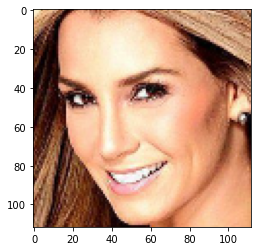

In [51]:
plt.imshow(big_data[0, 0, :, :, :])

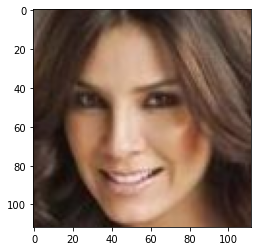

In [52]:
plt.imshow(big_data[0, 1])

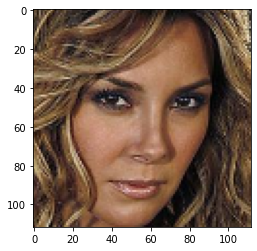

In [57]:
plt.imshow(big_data[0, 6])